In [10]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import KFold
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GroupShuffleSplit
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.datasets import make_regression
import warnings

warnings.filterwarnings('ignore')
dftrain = pd.read_csv("Without noise.csv")
dftest = pd.read_csv("With noise,2,SFS.csv")
dftest2 = pd.read_csv("Earlydays,2,100patients,4000.csv")

In [11]:
#Define as an array
# Xtrain=dftrain[["T","I1","I2", "V", "F"]]
Xtrain=dftrain[["I1","I2", "V", "F"]]
ytrain=dftrain['Flu/COVID']
timetrain=dftrain["Time Steps"]
IDtrain=dftrain["ID"]

# Xtest=dftest[["T","I1","I2", "V", "F"]]
Xtest=dftest[["I1","I2", "V", "F"]]
ytest=dftest['Flu/COVID']
timetest=dftest["Time Steps"]
IDtest=dftest["ID"]
#############################
# Xtrain2=dftrain[["T","I1","I2", "V", "F"]]
Xtrain2=dftrain[["I1","I2", "V", "F"]]
ytrain2=dftrain['Flu/COVID']
timetrain2=dftrain["Time Steps"]
IDtrain2=dftrain["ID"]

# Xtest2=dftest2[["T","I1","I2", "V", "F"]]
Xtest2=dftest2[["I1","I2", "V", "F"]]
ytest2=dftest2['Flu/COVID']
timetest2=dftest2["Time Steps"]
IDtest2=dftest2["ID"]

In [12]:
Xtrain /= Xtrain.std(axis=0)
Xtest /= Xtest.std(axis=0)
##############################
Xtrain /= Xtrain.std(axis=0)
Xtest /= Xtest.std(axis=0)

Xtrain2 /= Xtrain.std(axis=0)
Xtest2 /= Xtest2.std(axis=0)
##############################
Xtrain2 /= Xtrain2.std(axis=0)
Xtest2 /= Xtest2.std(axis=0)

In [13]:
# print(Xtest2)

In [14]:
# kf = GroupKFold(n_splits=5)
# kf = KFold(n_splits=6)
# kf.get_n_splits(Xtrain, ytrain, IDtrain)
# clf = LassoCV(cv=kf.split(Xtrain, ytrain, IDtrain)).fit(Xtrain, ytrain)
# roc_auc_score(ytest, clf.predict(Xtest))

kf = KFold(n_splits=6)
classifier=LassoCV(cv=kf.split(Xtrain, ytrain, IDtrain))
# classifier=RidgeCV(cv=kf.split(Xtrain, ytrain, IDtrain))
# classifier=RidgeCV(cv=kf.split(Xtrain, ytrain, IDtrain))
clf = classifier.fit(Xtrain, ytrain)
roc_auc_score(ytest, clf.predict(Xtest))
###########################################
kf2 = KFold(n_splits=6)
classifier2=LassoCV(cv=kf2.split(Xtrain2, ytrain2, IDtrain2))
# classifier2=RidgeCV(cv=kf.split(Xtrain2, ytrain2, IDtrain))
clf2 = classifier2.fit(Xtrain2, ytrain2)
roc_auc_score(ytest2, clf2.predict(Xtest2))
roc_auc_score(ytest, clf.predict(Xtest))

0.9544900826446281

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score
y_score1 = clf.predict(Xtest)
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(ytest, y_score1)
print('roc_auc_score for LASSO,1: ', roc_auc_score(ytest, y_score1))
#########################################
y_score2 = clf2.predict(Xtest2)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(ytest2, y_score2)
print('roc_auc_score for LASSO,2: ', roc_auc_score(ytest2, y_score2))

roc_auc_score for LASSO,1:  0.9544900826446281
roc_auc_score for LASSO,2:  0.91116875


In [16]:
# print(threshold2)

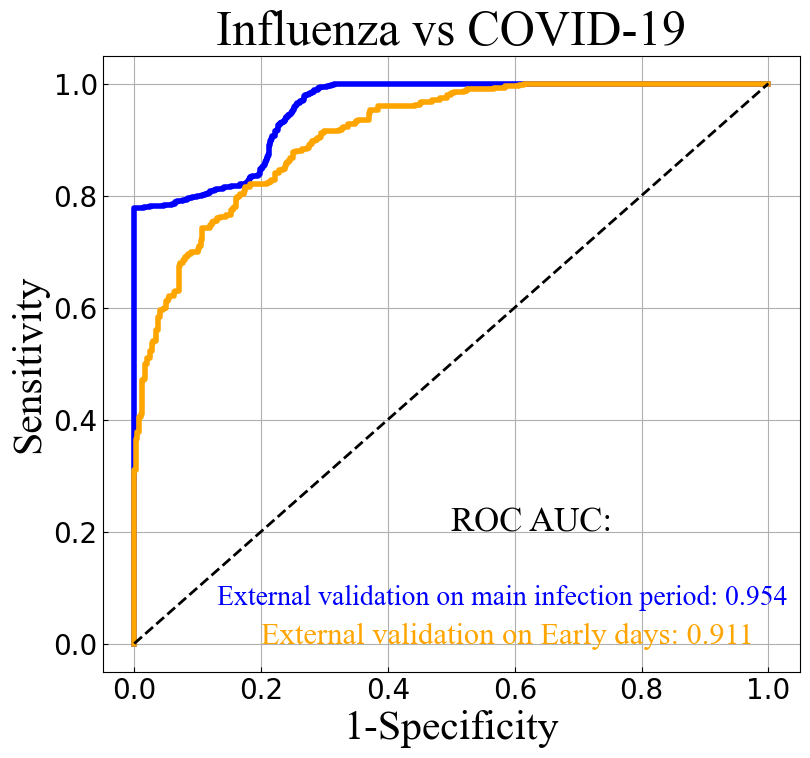

In [17]:
# plt.subplots(1, figsize=(10,10))
plt.figure(figsize=(9, 8))
csfont = {'fontname':'Times New Roman'}
plt.title('Influenza vs COVID-19',**csfont,size=35)
plt.plot(false_positive_rate1, true_positive_rate1,c='blue',linewidth=4)
plt.plot(false_positive_rate2, true_positive_rate2,c='orange',linewidth=4)
plt.plot([0, 1], ls="--",linewidth=2,c='black')
# plt.plot([0, 0], [1, 0] , c="black"), plt.plot([1, 1] , c="black")
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.xlabel("1-Specificity(=false positive rate)",**csfont,size=25)
# plt.ylabel("Sensitivity(=true positive rate)",**csfont,size=25)
plt.xlabel("1-Specificity",**csfont,size=30)
plt.ylabel("Sensitivity",**csfont,size=30)
# plt.title('ROC AUC: 0.868', y=0.21, x=0.83,**csfont,size=20)
# plt.suptitle("Main Title")
plt.text(0.5,0.2,'ROC AUC: ',**csfont,size=25)
plt.text(0.13,0.07,'External validation on main infection period: 0.954',**csfont,size=20,color="blue")
plt.text(0.2,0.0,'External validation on Early days: 0.911',**csfont,size=22,color="orange")
# plt.title('External validation: 0.868', y=0.15, pad=2,**csfont,size=10,c="blue")
# plt.legend(("ROC AUC: 0.868"),fontsize="20")
plt.axis("tight")
plt.xticks(fontsize=20)
plt.tick_params(axis="both",direction="in")
plt.yticks(fontsize=20)
plt.grid()
plt.show()
# plt.savefig("/Users/Owner/Desktop/AUC.pdf")